## Prostý tah

Načtení potřebných knihoven a spuštění sázeného textu:

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

### Př1:

U prutu podle obrázku stanovte bezpečnost vzhledem k meznímu stavu pružnosti u prutu podle obrázku. Jednotlivé úseky vymezené pružinami a osazením mají délky $a$, $b$ a $c$ značeno od volného konce.

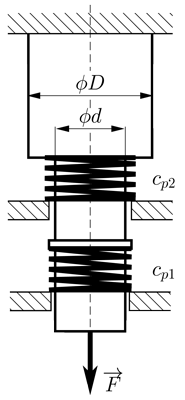

In [2]:
Image(filename='tah1a_.png')

#### Řešení:

Úloha je $2\times$ staticky neurčitá. Proto částečné uvolnění vypadá následovně, viz. obrázek,

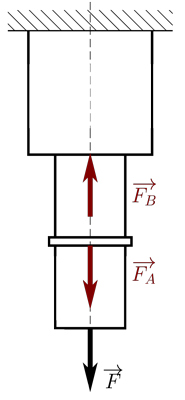

In [3]:
Image(filename='tah1aa_.png')

kde deformační podmínky mají tvar,

$$
  u_A=-c_{p1}F_A,\quad u_B=-c_{p2}F_B.
$$

Použité symboly v dalším výpočtu,

In [4]:
x,a,b,c=sp.symbols('x a b c')
D,d=sp.symbols('D d')
E=sp.symbols('E')
cp1,cp2=sp.symbols(r'c_{p1} c_{p2}')
F,FA,FB=sp.symbols('F F_A F_B')
x1,x2,x3=sp.symbols('x1 x2 x3')

Výsledné vnitřní účinky pro $x_1\in\left( 0,a\right)$, $x_2\in\left( 0,b\right)$ a $x_3\in\left( 0,c\right)$ mají tvar,

In [5]:
N1=F
N2=F+FA
N3=F+FA-FB
N1,N2,N3

Plochy příčných průřezů jsou,

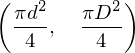

In [6]:
S1=sp.pi*d**2/4
S2=sp.pi*D**2/4
S1,S2

Potenciální energie prutu,

$$
  W=\int_0^a\frac{N_1^2}{2ES}\mathrm{d}x+\int_0^b\frac{N_2^2}{2ES}\mathrm{d}x+\int_0^c\frac{N_3^2}{2ES}\mathrm{d}x.
$$

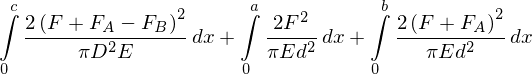

In [7]:
dW1=N1**2/2/E/S1
dW2=N2**2/2/E/S1
dW3=N3**2/2/E/S2
W=sp.Integral(dW1,[x,0,a])+sp.Integral(dW2,[x,0,b])+sp.Integral(dW3,[x,0,c])
W

Derivace potenciální energie podle $F_A$ a $F_B$, tj. výrazy

$$
  \frac{\partial W}{\partial F_A},\quad \frac{\partial W}{\partial F_B}.
$$

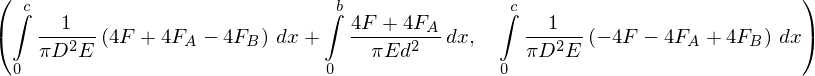

In [8]:
dWFA=W.diff(FA)
dWFB=W.diff(FB)
dWFA,dWFB

Rovnice deformačních podmínek, jak bylo poznamenáno výše, úloha je dvakrát staticky neurčitá,

\begin{equation}
  \frac{\partial W}{\partial F_A}=-c_{p1}F_A,\qquad \frac{\partial W}{\partial F_B}=-c_{p2}F_B.
\end{equation}

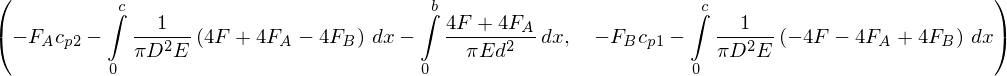

In [9]:
eqn1=-cp2*FA-dWFA
eqn2=-cp1*FB-dWFB
eqn1,eqn2

Po integraci,

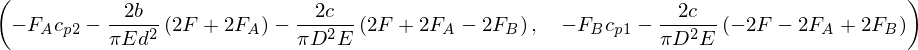

In [10]:
eqn1_=eqn1.doit()
eqn2_=eqn2.doit()
eqn1_,eqn2_

Řešení předchozí soustavy algebraických rovnic pro neznámé $F_A$ a  $F_B$

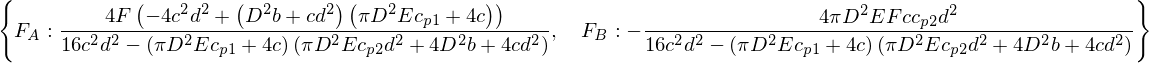

In [15]:
sol=sp.solve([eqn1_,eqn2_],[FA,FB])
sol

#### Numerický příklad:

\begin{eqnarray}
  a&=&50\,\mathrm{mm} \\
  b&=&50\,\mathrm{mm} \\
  c&=&50\,\mathrm{mm} \\
  D&=&10\,\mathrm{mm} \\
  d&=&8\,\mathrm{mm} \\
  r&=&2\,\mathrm{mm} \\
  E&=&2.1\times 10^5\,\mathrm{MPa} \\
  c_{p1}&=&5\times 10^{-6}\,\mathrm{mm/N} \\
  c_{p2}&=&1\times 10^{-7}\,\mathrm{mm/N} \\
  F&=&1\times10^4\,\mathrm{N}
\end{eqnarray}

In [16]:
a_,b_,c_=20.,30.,10.
F_=10000.
E_=2.1e5
D_,d_=10.,8.
cp1_,cp2_=0.05/10000,0.001/10000

Hodnoty sil $F_A$ a $F_B$:

In [17]:
FA_sol=sol[FA].subs({a:a_,b:b_,c:c_,d:d_,D:D_,F:F_,E:E_,cp1:cp1_,cp2:cp2_})
FB_sol=sol[FB].subs({a:a_,b:b_,c:c_,d:d_,D:D_,F:F_,E:E_,cp1:cp1_,cp2:cp2_})
float(FA_sol),float(FB_sol)

Hodnoty vniřních účinků $N_1$, $N_2$ a $N_3$:

In [18]:
N1_=N1.subs({F:F_,FA:FA_sol,FB:FB_sol})
N2_=N2.subs({F:F_,FA:FA_sol,FB:FB_sol})
N3_=N3.subs({F:F_,FA:FA_sol,FB:FB_sol})
float(N1_),float(N2_),float(N3_)

Plochy jednotlivých příčných průřezů:

In [19]:
S1_=S1.subs(d,d_)
S2_=S2.subs(D,D_)
float(S1_),float(S2_)

Nominální napětí:

\begin{equation}
  \sigma_1=\frac{N_1}{S_1},\quad\sigma_2=\frac{N_2}{S_1}\quad\mathrm{a}\quad\sigma_3\frac{N_3}{S_2}.
\end{equation}

In [20]:
sigma1=N1_/S1_
sigma2=N2_/S1_
sigma3=N3_/S2_
float(sigma1),float(sigma2),float(sigma3)

Podle souboru *BIE-alpha* je napětí pro vrub

\begin{equation}
  \frac{d}{D}=0.8\quad\mathrm{a}\quad\frac{r}{D}=0.2
\end{equation}

$1.5\times$ vetší než napětí nominální, tedy

\begin{equation}
  \alpha=\frac{\sigma_{skut}}{\sigma_{nom}}\thickapprox 1.5.
\end{equation}

In [21]:
alpha=1.5

Hodnoty skutečných napětí:

In [22]:
sigma1_=sigma1
sigma2_=alpha*sigma2
sigma3_=sigma3
float(sigma1_),float(sigma2_),float(sigma3_)